Problem 1

1. Print the shapes of these 4 objects (presuming Xtr, Xte, Ytr, Yte)

In [9]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml

data = np.genfromtxt("data/curve80.txt",delimiter=None) # load the text file

X = data[:,0] # scalar feature X values
X = np.atleast_2d(X).T # code expects shape (M,N) so make sure it’s 2-dimensional
Y = data[:,1] # doesn’t matter for Y; target value Y
Xtr,Xte,Ytr,Yte = ml.splitData(X,Y,0.75) # split data set 75/25
print(Xtr.shape)
print(Xte.shape)
print(Ytr.shape)
print(Yte.shape)

(60, 1)
(20, 1)
(60,)
(20,)


2. 

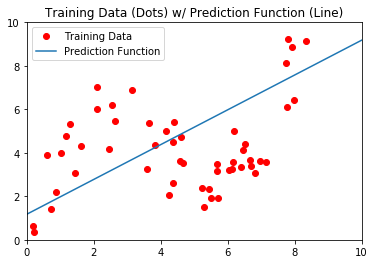

In [10]:
# Part A
import sys
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml

# training data
data = np.genfromtxt("data/curve80.txt",delimiter=None) # load the text file

X = data[:,0] # scalar feature X values
X = np.atleast_2d(X).T # code expects shape (M,N) so make sure it’s 2-dimensional
Y = data[:,1] # doesn’t matter for Y; target value Y
Xtr,Xte,Ytr,Yte = ml.splitData(X,Y,0.75) # split data set 75/25

# prediction function
lr = ml.linear.linearRegress( Xtr, Ytr ) # create and train model
xs = np.linspace(0,10,200) # densely sample possible x-values
xs = xs[:,np.newaxis] # force "xs" to be an Mx1 matrix (expected by ourcode)
ys = lr.predict( xs ) # make predictions at xs

fig, ax = plt.subplots(1,1) #rows, columns = just one plot; probably good practice since these plots are more customizable

ax.plot(Xtr, Ytr, "o", color = "red", label = "Training Data") # o = dots
ax.plot(xs, ys, "-", label = "Prediction Function") #- = line
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_title("Training Data (Dots) w/ Prediction Function (Line)")
ax.legend()

plt.show()

In [11]:
# Part B
import sys
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml

# training data
data = np.genfromtxt("data/curve80.txt",delimiter=None) # load the text file

X = data[:,0] # scalar feature X values
X = np.atleast_2d(X).T # code expects shape (M,N) so make sure it’s 2-dimensional
Y = data[:,1] # doesn’t matter for Y; target value Y
Xtr,Xte,Ytr,Yte = ml.splitData(X,Y,0.75) # split data set 75/25

# prediction function
lr = ml.linear.linearRegress( Xtr, Ytr ) # create and train model
xs = np.linspace(0,10,200) # densely sample possible x-values
xs = xs[:,np.newaxis] # force "xs" to be an Mx1 matrix (expected by ourcode)
ys = lr.predict( xs ) # make predictions at xs

print(lr.theta)

[[1.17688325 0.8002613 ]]


The value 1.17688325, 0.8002613 matches the plot I made in Part A since the y-intercept is more than halfway between 0 and 2 and the slope looks a bit smaller than 1.

In [12]:
# Part C
import sys
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml

# training data
data = np.genfromtxt("data/curve80.txt",delimiter=None) # load the text file

X = data[:,0] # scalar feature X values
X = np.atleast_2d(X).T # code expects shape (M,N) so make sure it’s 2-dimensional
Y = data[:,1] # doesn’t matter for Y; target value Y
Xtr,Xte,Ytr,Yte = ml.splitData(X,Y,0.75) # split data set 75/25

# prediction function
lr = ml.linear.linearRegress( Xtr, Ytr ) # create and train model
xs = np.linspace(0,10,200) # densely sample possible x-values
xs = xs[:,np.newaxis] # force "xs" to be an Mx1 matrix (expected by ourcode)
ys = lr.predict( xs ) # make predictions at xs

#Mean Squared Error TRAINING
msetr = np.square(np.subtract(Xtr,Ytr)).mean()
print(msetr)

#Mean Squared Error TEST
msete = np.square(np.subtract(Xte,Yte)).mean()
print(msete)

18.987518145697546
20.286485695915566


3.

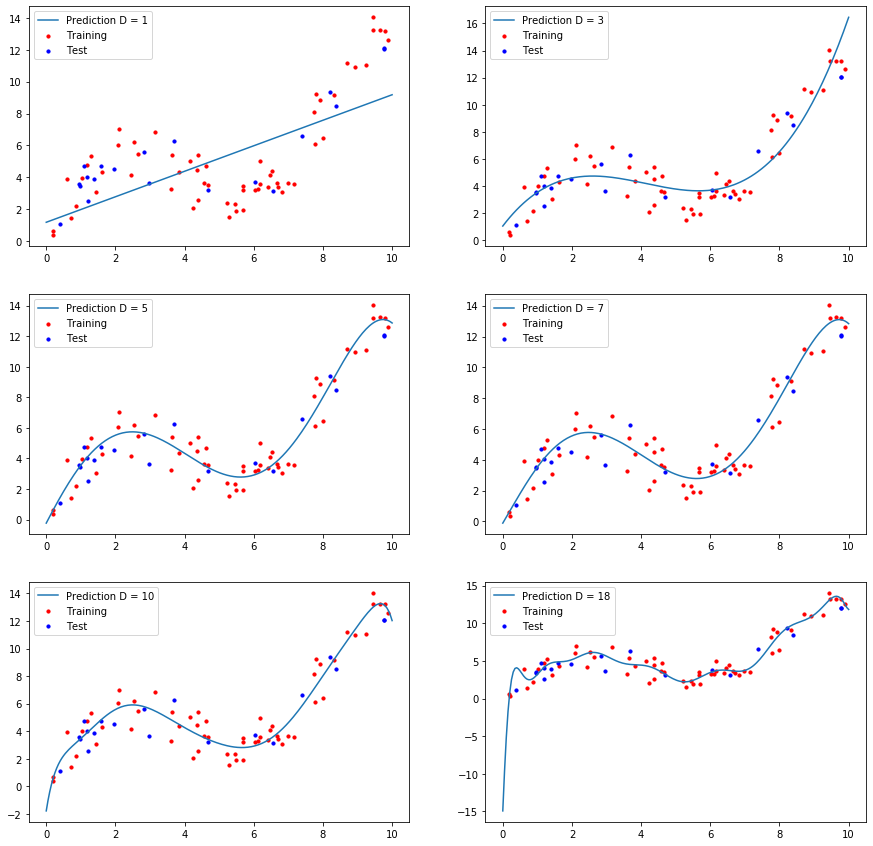

In [13]:
# Part A plot learned prediction functions TRY2
import sys
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml

# training data
data = np.genfromtxt("data/curve80.txt",delimiter=None) # load the text file

X = data[:,0] # scalar feature X values
X = np.atleast_2d(X).T # code expects shape (M,N) so make sure it’s 2-dimensional
Y = data[:,1] # doesn’t matter for Y; target value Y
Xtr,Xte,Ytr,Yte = ml.splitData(X,Y,0.75) # split data set 75/25

d = [1, 3, 5, 7, 10, 18] # degree array
xs = np.linspace(0,10,200) # densely sample possible x-values; xs = x sample
xs = xs[:,np.newaxis] # force "xs" to be an Mx1 matrix (expected by ourcode)

#need 6 plots; 3 rows, 2 columns
# fig = figure (which contains the plots), ax = idk guess it's the subplots within the figure
fig, ax = plt.subplots(3, 2, figsize =(15,15))
ax = ax.ravel() #makes the thing 1D, 1d array of arrays 
#enumerate makes [a, b, c] become (1,a) (2,b) (3,c)
#for each of those subplots
for i, ax in enumerate(ax):
    degree = d[i]
    # Create polynomial features up to "degree"; don’t create constant feature
    # (the linear regression learner will add the constant feature automatically)
    XtrP = ml.transforms.fpoly(Xtr, degree, bias=False)
    
    # Rescale the data matrix so that the features have similar ranges / variance
    XtrP,params = ml.transforms.rescale(XtrP)
    # "params" returns the transformation parameters (shift & scale)

    # Then we can train the model on the scaled feature matrix:
    lr = ml.linear.linearRegress( XtrP, Ytr ) # create and train model
    
    # Now, apply the same polynomial expansion & scaling transformation to Xtest(used xs since Xte didn't work and since xs was used in number 2 and it worked there):
    XteP = ml.transforms.fpoly(xs, degree, bias = False)
    XteP,_ = ml.transforms.rescale( XteP, params )    
    
    ys = lr.predict( XteP ) # make predictions at XteP

    #array, shape, size, color
    ax.scatter(Xtr, Ytr, s = 10, color = "red", label = "Training")
    ax.scatter(Xte, Yte, s = 10, color = "blue", label = "Test")
    ax.plot(xs, ys, "-", label = "Prediction D = %s" %degree)
    ax.legend()
    
plt.show()



(60, 1)
Degree 1, Mean Squared Error TRAINING 36.235312664561164, Mean Squared Error TEST 37.41485625567612

Degree 3, Mean Squared Error TRAINING 35.57535433998448, Mean Squared Error TEST 35.75421063865282

Degree 5, Mean Squared Error TRAINING 35.23948972696212, Mean Squared Error TEST 34.727447118928886

Degree 7, Mean Squared Error TRAINING 35.0844570861395, Mean Squared Error TEST 34.103388838111755

Degree 10, Mean Squared Error TRAINING 35.0176577121182, Mean Squared Error TEST 33.55052064929165

Degree 18, Mean Squared Error TRAINING 35.15471863600721, Mean Squared Error TEST 32.88274591659867



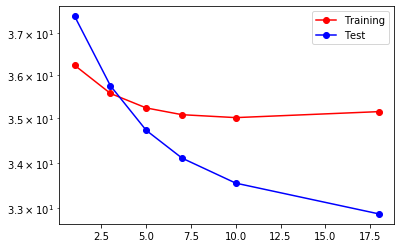

In [14]:
# Part B plot their training and test errors on a log scale (semilogy) as a function of the degree. (10 points)
import sys
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml

# training data
data = np.genfromtxt("data/curve80.txt",delimiter=None) # load the text file

X = data[:,0] # scalar feature X values
X = np.atleast_2d(X).T # code expects shape (M,N) so make sure it’s 2-dimensional
Y = data[:,1] # doesn’t matter for Y; target value Y
Xtr,Xte,Ytr,Yte = ml.splitData(X,Y,0.75) # split data set 75/25

d = np.array([1, 3, 5, 7, 10, 18]) # degree list -> made into array because of future error
xs = np.linspace(0,10,200) # densely sample possible x-values; xs = x sample
xs = xs[:,np.newaxis] # force "xs" to be an Mx1 matrix (expected by ourcode)

semitr = []
semite = []

Ytr = Ytr[:,np.newaxis]
Yte = Yte[:,np.newaxis]
print(Ytr.shape)

#enumerate makes [a, b, c] become (1,a) (2,b) (3,c)
#for each of those subplots
for i in d:
    degree = i
    # Create polynomial features up to "degree"; don’t create constant feature
    # (the linear regression learner will add the constant feature automatically)
    XtrP = ml.transforms.fpoly(Xtr, degree, bias=False)
    # Rescale the data matrix so that the features have similar ranges / variance
    XtrP,params = ml.transforms.rescale(XtrP)
    # "params" returns the transformation parameters (shift & scale)
    # Then we can train the model on the scaled feature matrix:
    lr = ml.linear.linearRegress( XtrP, Ytr ) # create and train model
    
    # Now, apply the same polynomial expansion & scaling transformation to Xtest(used xs since Xte didn't work and since xs was used in number 2 and it worked there):
    XteP = ml.transforms.fpoly(Xte, degree, bias = False)
    XteP,_ = ml.transforms.rescale( XteP, params )    
    
    ys = lr.predict( XteP ) # make predictions at XteP 

    #Mean Squared Error TRAINING (from geeksforgeeks)
    msetr = np.square(np.subtract(XtrP,Ytr)).mean()
    semitr.append(msetr)
    #Mean Squared Error TEST
    msete = np.square(np.subtract(XteP,Yte)).mean()
    semite.append(msete)
    dstring = "Degree {}, Mean Squared Error TRAINING {}, Mean Squared Error TEST {}\n".format(degree,msetr,msete)
    print(dstring)

#need 1 plot with degree as x and mse as y
#array, shape, size, color
plt.semilogy(d, semitr, marker="o", color = "red", label = "Training")
plt.semilogy(d, semite, marker="o", color = "blue", label = "Test")

plt.legend()   
plt.show()



C) What polynomial degree do you recommend? (5 points)
I would recommend degree 18 since it has the smallest MSE on test data.


Problem 2

1.

Degree 1, MSE Cross Validation 36.138191795844854, MSE TEST 37.41485625567612

Degree 3, MSE Cross Validation 35.410260092771495, MSE TEST 35.75421063865282

Degree 5, MSE Cross Validation 35.048335040091985, MSE TEST 34.727447118928886

Degree 7, MSE Cross Validation 34.89106051537561, MSE TEST 34.103388838111755

Degree 10, MSE Cross Validation 34.83229891590093, MSE TEST 33.55052064929165

Degree 18, MSE Cross Validation 34.98206510950179, MSE TEST 32.88274591659867



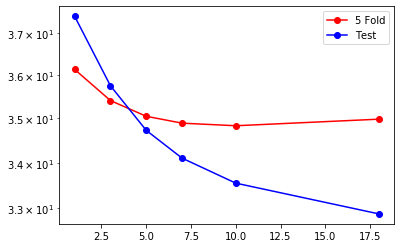

In [15]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml

# training data
data = np.genfromtxt("data/curve80.txt",delimiter=None) # load the text file

X = data[:,0] # scalar feature X values
X = np.atleast_2d(X).T # code expects shape (M,N) so make sure it’s 2-dimensional
Y = data[:,1] # doesn’t matter for Y; target value Y
Xtr,Xte,Ytr,Yte = ml.splitData(X,Y,0.75) # split data set 75/25

# prediction function
lr = ml.linear.linearRegress( Xtr, Ytr ) # create and train model
xs = np.linspace(0,10,200) # densely sample possible x-values
xs = xs[:,np.newaxis] # force "xs" to be an Mx1 matrix (expected by ourcode)
ys = lr.predict( xs ) # make predictions at xs

d = np.array([1, 3, 5, 7, 10, 18]) # degree list -> made into array because of future error
xs = np.linspace(0,10,200) # densely sample possible x-values; xs = x sample
xs = xs[:,np.newaxis] # force "xs" to be an Mx1 matrix (expected by ourcode)

semitr = []
semite = []
msefold = []

# was getting some mismatch shape error so this fixes that
Ytr = Ytr[:,np.newaxis]
Yte = Yte[:,np.newaxis]


#enumerate makes [a, b, c] become (1,a) (2,b) (3,c)
#for each of those subplots
for i in d:
    degree = i
    # Create polynomial features up to "degree"; don’t create constant feature
    # (the linear regression learner will add the constant feature automatically)
    XtrP = ml.transforms.fpoly(Xtr, degree, bias=False)
    # Rescale the data matrix so that the features have similar ranges / variance
    XtrP,params = ml.transforms.rescale(XtrP)
    # "params" returns the transformation parameters (shift & scale)
    # Then we can train the model on the scaled feature matrix:
    lr = ml.linear.linearRegress( XtrP, Ytr ) # create and train model
    
    # Now, apply the same polynomial expansion & scaling transformation to Xtest(used xs since Xte didn't work and since xs was used in number 2 and it worked there):
    XteP = ml.transforms.fpoly(Xte, degree, bias = False)
    XteP,_ = ml.transforms.rescale( XteP, params )    
    
    ys = lr.predict( XteP ) # make predictions at XteP 

    #Mean Squared Error TRAINING (from geeksforgeeks)
    #msetr = np.square(np.subtract(XtrP,Ytr)).mean()
    #semitr.append(msetr)
    #Mean Squared Error TEST
    msete = np.square(np.subtract(XteP,Yte)).mean()
    semite.append(msete)
    #dstring = "Degree {}, Mean Squared Error TRAINING {}, Mean Squared Error TEST {}\n".format(degree,msetr,msete)
    #print(dstring)
    
    # 5 fold validation test
    J = []
    nFolds = 5;
    for iFold in range(nFolds):
        Xti,Xvi,Yti,Yvi = ml.crossValidate(Xtr,Ytr,nFolds,iFold) # use ith block as validation
        Yti = Yti[:,np.newaxis]
        Yvi = Yvi[:,np.newaxis]
        # Create polynomial features up to "degree"; don’t create constant feature
        # (the linear regression learner will add the constant feature automatically)
        XtiP = ml.transforms.fpoly(Xti, degree, bias=False)
        # Rescale the data matrix so that the features have similar ranges / variance
        XtiP,params = ml.transforms.rescale(XtiP)
        # "params" returns the transformation parameters (shift & scale)
        # Then we can train the model on the scaled feature matrix:
        learner = ml.linear.linearRegress( XtiP, Yti ) # create and train model

        # Now, apply the same polynomial expansion & scaling transformation to Xtest(used xs since Xte didn't work and since xs was used in number 2 and it worked there):
        XviP = ml.transforms.fpoly(Xvi, degree, bias = False)
        XviP,_ = ml.transforms.rescale( XviP, params )    

        J.append(np.square(np.subtract(XviP,Yvi)).mean()) # TODO: now compute the MSE on Xvi, Yvi and save it
        # the overall estimated validation error is the average of the error on each fold
    msefold.append(np.mean(J))
    
    dstring = "Degree {}, MSE Cross Validation {}, MSE TEST {}\n".format(degree,np.mean(J),msete)
    print(dstring)

#need 1 plot with degree as x and mse as y
#array, shape, size, color
plt.semilogy(d, msefold, marker="o", color = "red", label = "5 Fold")
plt.semilogy(d, semite, marker="o", color = "blue", label = "Test")

plt.legend()
plt.show()

2.
The MSE estimates from five-fold cross-validation are lower overall compared to the MSE evaluated on the actual test data.

3.
I would recommend degree 10 since the MSE is the smallest at that degree.

4.

Degree 10, MSE Cross Validation 34.201271839391325, MSE TEST 33.55052064929165

Degree 10, MSE Cross Validation 34.87710041536575, MSE TEST 33.55052064929165

Degree 10, MSE Cross Validation 34.850100731320005, MSE TEST 33.55052064929165

Degree 10, MSE Cross Validation 34.83229891590093, MSE TEST 33.55052064929165

Degree 10, MSE Cross Validation 34.830422461744185, MSE TEST 33.55052064929165

Degree 10, MSE Cross Validation 34.69936836184009, MSE TEST 33.55052064929165

Degree 10, MSE Cross Validation 34.76570613810417, MSE TEST 33.55052064929165

Degree 10, MSE Cross Validation 34.75630364720324, MSE TEST 33.55052064929165



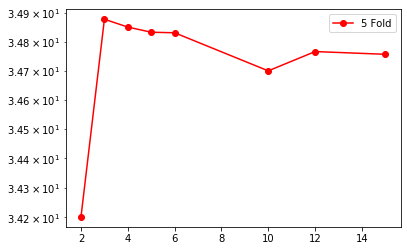

In [16]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml

# training data
data = np.genfromtxt("data/curve80.txt",delimiter=None) # load the text file

X = data[:,0] # scalar feature X values
X = np.atleast_2d(X).T # code expects shape (M,N) so make sure it’s 2-dimensional
Y = data[:,1] # doesn’t matter for Y; target value Y
Xtr,Xte,Ytr,Yte = ml.splitData(X,Y,0.75) # split data set 75/25

# prediction function
lr = ml.linear.linearRegress( Xtr, Ytr ) # create and train model
xs = np.linspace(0,10,200) # densely sample possible x-values
xs = xs[:,np.newaxis] # force "xs" to be an Mx1 matrix (expected by ourcode)
ys = lr.predict( xs ) # make predictions at xs

#DEGREE 10
d = np.array([10]) # degree list -> made into array because of future error
xs = np.linspace(0,10,200) # densely sample possible x-values; xs = x sample
xs = xs[:,np.newaxis] # force "xs" to be an Mx1 matrix (expected by ourcode)

semitr = []
semite = []
msefold = []

# was getting some mismatch shape error so this fixes that
Ytr = Ytr[:,np.newaxis]
Yte = Yte[:,np.newaxis]


#enumerate makes [a, b, c] become (1,a) (2,b) (3,c)
#for each of those subplots
for i in d:
    degree = i
    # Create polynomial features up to "degree"; don’t create constant feature
    # (the linear regression learner will add the constant feature automatically)
    XtrP = ml.transforms.fpoly(Xtr, degree, bias=False)
    # Rescale the data matrix so that the features have similar ranges / variance
    XtrP,params = ml.transforms.rescale(XtrP)
    # "params" returns the transformation parameters (shift & scale)
    # Then we can train the model on the scaled feature matrix:
    lr = ml.linear.linearRegress( XtrP, Ytr ) # create and train model
    
    # Now, apply the same polynomial expansion & scaling transformation to Xtest(used xs since Xte didn't work and since xs was used in number 2 and it worked there):
    XteP = ml.transforms.fpoly(Xte, degree, bias = False)
    XteP,_ = ml.transforms.rescale( XteP, params )    
    
    ys = lr.predict( XteP ) # make predictions at XteP 

    #Mean Squared Error TRAINING (from geeksforgeeks)
    #msetr = np.square(np.subtract(XtrP,Ytr)).mean()
    #semitr.append(msetr)
    #Mean Squared Error TEST
    msete = np.square(np.subtract(XteP,Yte)).mean()
    semite.append(msete)
    
    # 5 fold validation test
    
    nFolds = np.array([2, 3, 4, 5, 6, 10, 12, 15]);
    for iFold in nFolds:
        J = []
        for i in range(iFold): #need this since we still need to go through each fold
            Xti,Xvi,Yti,Yvi = ml.crossValidate(Xtr,Ytr,iFold,i) # use ith block as validation
            Yti = Yti[:,np.newaxis]
            Yvi = Yvi[:,np.newaxis]
            XtiP = ml.transforms.fpoly(Xti, degree, bias=False)
            XtiP,params = ml.transforms.rescale(XtiP)
            learner = ml.linear.linearRegress( XtiP, Yti ) # create and train model

            # Now, apply the same polynomial expansion & scaling transformation to Xtest(used xs since Xte didn't work and since xs was used in number 2 and it worked there):
            XviP = ml.transforms.fpoly(Xvi, degree, bias = False)
            XviP,_ = ml.transforms.rescale( XviP, params )    

            J.append(np.square(np.subtract(XviP,Yvi)).mean()) # TODO: now compute the MSE on Xvi, Yvi and save it
        msefold.append(np.mean(J))

        dstring = "Degree {}, MSE Cross Validation {}, MSE TEST {}\n".format(degree,np.mean(J),msete)
        print(dstring)

#need 1 plot with folds as x and mse as y for DEGREE 10
#array, shape, size, color
plt.semilogy(nFolds, msefold, marker="o", color = "red", label = "5 Fold")

plt.legend()
plt.show()

I observe that the MSE varies wildly for the first few folds, but as we hit 10 folds and higher the MSE seems to level off between 34.7 and 34.8. I think it's also worth it to note that the error only spans within a MSE of 34, which makes sense since Degree 10 had a MSE of 34.83 in Part 1 of this Problem.

Problem 3  
X = random variable with values x  
meanx = E[X] = integral(p(x) x dx) ; p(x) = probability density function for X  
variance(X) = E[(X-meanx)^2] = integral(p(x)(x-meanx)^2 dx)  
a = scalar constant  
b = scalar constant  

Part 1  
Prove E[aX+b] = aE[X] + b  
E[aX+b] = E[aX] + E[b]  
The expectation of a scalar constant is just that constant, so we can further simplify  
= aE[X] + b

Part 2  
Prove var(aX+b) = a^2 * var(X)   
We know var(X) = E[X^2] - E[X]^2 so we can rewrite this  
var(aX+b)=E[(aX+b)^2] - E[(aX+b)]^2  
=E[a^2X^2 + 2abX + b^2] - E[(aX+b)]^2  
Using the proof of number 1 here  
=E[a^2X^2] + E[2abX] + E[b^2] - (aE[X]+b)^2  
=(a^2)E[X^2] + (2ab)E[X] + b^2 - (a^2(E[X])^2 + 2abE[X] + b^2)  
=(a^2)E[X^2] + (2ab)E[X] + b^2 - a^2(E[X])^2 - (2ab)E[X] - b^2  
=(a^2)E[X^2] - a^2(E[X])^2  
=(a^2)(E[X^2] - (E[X])^2)  
Wait that looks familiar, because the stuff in the right term is variance!  
(Using number 3)  
=a^2 * var(X)

Part 3  
Prove var(X) = E[X^2] - (E[X])^2  
=E[X^2 - 2meanxX + meanx^2]  
Can get rid of the E in the E  
=E[X^2 - meanx^2]  
We can split these  
=E[X^2] - meanx^2  
We know meanx = E[X]  
=E[X^2] - E[X]^2


Statement of Collaboration  
I used Google and the lecture slides regarding linear regression. I used the official scipy/numpy documentation and geeksforgeeks.org. I used some Piazza help as well.
https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplots.html